## 2D Diffusion Equation with constant temperature boundary conditions

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
NX=50 # Number of divisions in X-direction
NY=50 # Number of divisions in Y-direction
LX=1
LY=1
dx=LX/NX
dy=LY/NY

In [3]:
X_C=np.arange(0,LX,dx)
Y_C=np.arange(0,LY,dy)
XD,YD=np.meshgrid(X_C,Y_C)

In [4]:
k=5      # Thermal Conductivity
a_e=(k/dx)*dy
a_w=(k/dx)*dy
a_n=(k/dy)*dx
a_s=(k/dy)*dx

In [5]:
CFM=np.zeros((NX*NY,NX*NY))                 # Coefficient Matrix
for i in range(1,NX-1):
    for j in range(1,NY-1):
        CFM[NY*(i)+j,NY*(i)+j-1]=-a_w
        CFM[NY*(i)+j,NY*(i-1)+j]=-a_s
        CFM[NY*(i)+j,NY*(i)+j+1]=-a_e
        CFM[NY*(i)+j,NY*(i+1)+j]=-a_n
        CFM[NY*(i)+j,NY*(i)+j]=a_e+a_w+a_n+a_s
for i in range(1,NY-1):                         # Bottom face
    CFM[NY*0+i,NY*0+i+1]=-a_e
    CFM[NY*0+i,NY*(0+1)+i]=-a_n
    CFM[NY*0+i,NY*0+i-1]=-a_w
    CFM[NY*0+i,NY*0+i]=a_e+a_n+a_w+(2*a_s)
for i in range(1,NY-1):                         # Top face
    CFM[NY*(NX-1)+i,NY*(NX-1)+i+1]=-a_e
    CFM[NY*(NX-1)+i,NY*((NX-1)-1)+i]=-a_s
    CFM[NY*(NX-1)+i,NY*(NX-1)+i-1]=-a_w
    CFM[NY*(NX-1)+i,NY*(NX-1)+i]=a_e+a_n+a_w+(2*a_n)
for j in range(1,NX-1):                         # Left face
    CFM[NY*(j)+0,NY*(j)+1]=-a_e
    CFM[NY*(j)+0,NY*(j-1)+0]=-a_s
    CFM[NY*(j)+0,NY*(j+1)+0]=-a_n
    CFM[NY*(j)+0,NY*(j)+0]=a_e+a_s+a_n+(2*a_w)
for j in range(1,NX-1):                         # Right face
    CFM[NY*(j)+NY-1,NY*(j)+NY-1-1]=-a_w
    CFM[NY*(j)+NY-1,NY*(j-1)+NY-1]=-a_s
    CFM[NY*(j)+NY-1,NY*(j+1)+NY-1]=-a_n
    CFM[NY*(j)+NY-1,NY*(j)+NY-1]=a_w+a_s+a_n+(2*a_e)
###################################################################
CFM[NY*0+0,NY*0+0]=a_e+a_n+(2*a_w)+(2*a_s)                  #Corner SW
CFM[NY*0+0,NY*0+1]=-a_e
CFM[NY*0+0,NY*1+0]=-a_n

CFM[NY*0+NY-1,NY*0+NY-1]=a_w+a_n+(2*a_e)+(2*a_s)            #Corner SE
CFM[NY*0+NY-1,NY*0+NY-1-1]=-a_w
CFM[NY*0+NY-1,NY*1+NY-1]=-a_n

CFM[NY*(NX-1)+NY-1,NY*(NX-1)+NY-1]=a_w+a_s+(2*a_n)+(2*a_e)  #Corner NE
CFM[NY*(NX-1)+NY-1,NY*(NX-1)+NY-1-1]=-a_w
CFM[NY*(NX-1)+NY-1,NY*(NX-1-1)+NY-1]=-a_s

CFM[NY*(NX-1)+0,NY*(NX-1)+0]=a_e+a_s+(2*a_n)+(2*a_w)        #Corner NW
CFM[NY*(NX-1)+0,NY*(NX-1)+0+1]=-a_e
CFM[NY*(NX-1)+0,NY*(NX-1-1)+0]=-a_s

In [6]:
#BOUNDARY CONDITIONS
T_L=200                                # LEFT FACE TEMPERTURE in KELVIN
T_T=100                                # TOP FACE  TEMPERTURE in KELVIN
T_R=500                                # RIGHT FACE TEMPERTURE in KELVIN
T_B=300                                # BOTTOM FACE TEMPERTURE in KELVIN

BCV=np.zeros(NX*NY)                    # BOUNDARY CONDITION VECTOR
for i in range(1,NY-1):
    BCV[NY*0+i]=2*a_s*T_B               # BOTTOM FACE
    BCV[NY*(NX-1)+i]=2*a_n*T_T          # TOP FACE
for j in range(1,NX-1):
    BCV[NY*j+0]=2*a_w*T_L               # LEFT FACE
    BCV[NY*j+NY-1]=2*a_e*T_R            # RIGHT FACE

BCV[NY*0+0]=(2*a_w*T_L)+(2*a_s*T_B)             # Corner SW
BCV[NY*0+NY-1]=(2*a_e*T_R)+(2*a_s*T_B)          # Corner SE
BCV[NY*(NX-1)+NY-1]=(2*a_e*T_R)+(2*a_n*T_T)     # Corner NE
BCV[NY*(NX-1)+0]=(2*a_w*T_L)+(2*a_n*T_T)        # Corner NW

In [7]:
TFV=np.dot(np.linalg.inv(CFM),BCV)

In [8]:
Grid_T=np.zeros((NX,NY))
for i in range(NX*NY):
    Grid_T[(i//NY),i%NY]=TFV[i]

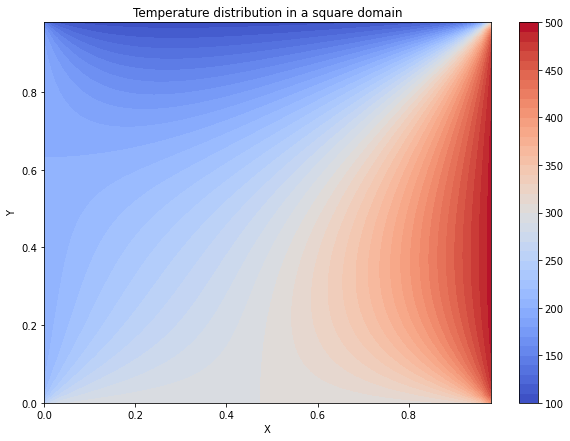

In [9]:
plt.figure(figsize=(10,7))
plt.contourf(XD,YD,Grid_T,levels=40,cmap='coolwarm')
plt.title('Temperature distribution in a square domain')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()
plt.show()